[[ 0.          1.          1.41421356  2.        ]
 [ 2.          7.          2.82842712  3.        ]
 [ 3.          8.          2.82842712  4.        ]
 [ 4.          9.          2.82842712  5.        ]
 [ 5.         10.          2.82842712  6.        ]
 [ 6.         11.          2.82842712  7.        ]]


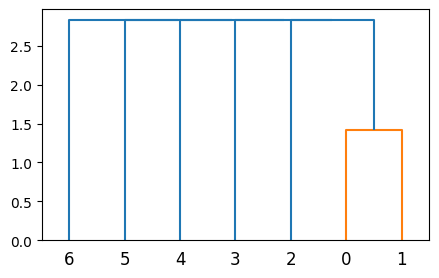

In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

# 示例数据
x = [[1, 2], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13]]
z = linkage(x, 'single')
f = fcluster(z, 2, 'distance')
# 创建画布
plt.figure(figsize=(5, 3))
# 绘制图像
dendrogram(z)

print(z)
plt.show()

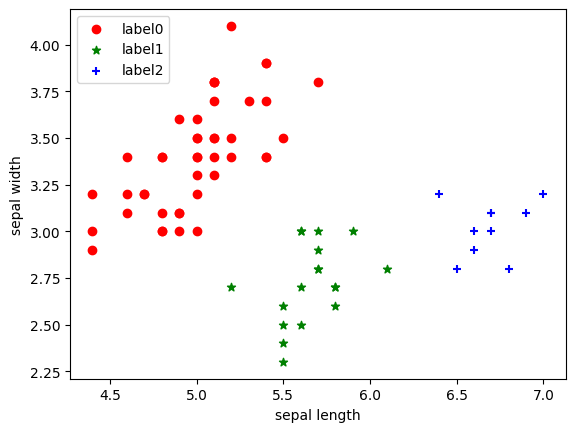

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN

# 加载鸢尾花数据集
iris = datasets.load_iris()
# 取出鸢尾花数据集所有数据行的前4列数据
x = iris.data[:, :4]

# 基于密度的聚类算法，eps:以某个样本为中心，在半径为eps的范围内所能找到的样本数目
# min_samples：核心对象所需要的邻域内样本数目的最小值
dbscan = DBSCAN(eps=0.4, min_samples=9)
# 根据数据x进行聚类分析
dbscan.fit(x)
# 样本标签
label_pred = dbscan.labels_

# 绘制结果图像
x0 = x[label_pred == 0]
x1 = x[label_pred == 1]
x2 = x[label_pred == 2]
plt.scatter(x0[:, 0], x0[:, 1], c="red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c="green", marker='*', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c="blue", marker='+', label='label2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)
plt.show()

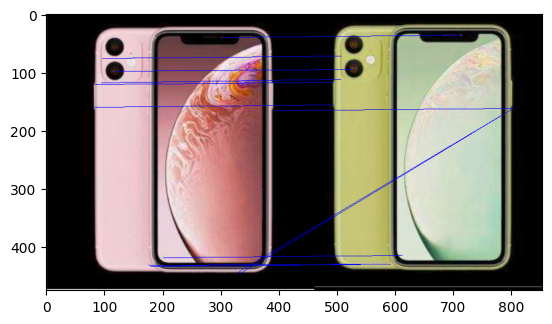

In [8]:
import cv2
import numpy as np


# 通过连线的方式比较两张图片的关键点
def drawMatchesKnn(img1, kp1, img2, kp2, goodMatches):
    # 获取图片的高度和宽度
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # 两个图像合并后的结果，
    result = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)

    # 指定两个图像在结果中的位置，
    result[:h1, :w1] = img1
    result[:h2, w1:w1 + w2] = img2

    # 获取关键点
    p1 = [kpp.queryIdx for kpp in goodMatches]
    p2 = [kpp.trainIdx for kpp in goodMatches]

    # 将关键点坐标转换为整数类型并进行平移操作。
    post1 = np.int32([kp1[i].pt for i in p1])
    post2 = np.int32([kp2[i].pt for i in p2]) + (w1, 0)

    # 在图像上画出红色线段
    for (x1, y1), (x2, y2) in zip(post1, post2):
        cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255))

#     cv2.namedWindow("match", cv2.WINDOW_NORMAL)
    plt.imshow(result)


# 获取需要匹配的两张图片
img1 = cv2.imread("iphone1.png")
img2 = cv2.imread("iphone2.png")

# 创建sift特征检测器
sift = cv2.xfeatures2d.SIFT_create()

# 使用sift检测灰度图中的关键点和描述符，并返回关键点和描述符矩阵
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# 基于暴力匹配的方式进行特征匹配
bf = cv2.BFMatcher(cv2.NORM_L2)

# 将待匹配图片的特征与目标图片中的全部特征全量遍历，找出相似度最高的前k个。
matches = bf.knnMatch(des1, des2, k=2)

# 将符合标准的特征添加到goodMatch中
goodMatches = []
for m, n in matches:
    if m.distance < 0.50 * n.distance:
        goodMatches.append(m)

drawMatchesKnn(img1, kp1, img2, kp2, goodMatches)

cv2.waitKey(0)
cv2.destroyAllWindows()

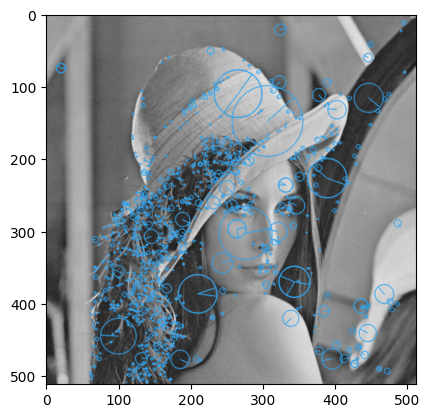

In [6]:
import cv2

# 获取图片信息
img1 = cv2.imread('lenna.png')

# 图片灰度化
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# 创建sift特征检测器
sift = cv2.xfeatures2d.SIFT_create()
# 使用sift检测灰度图中的关键点和描述符，并返回关键点和描述符矩阵
kp1, des1 = sift.detectAndCompute(img1_gray, None)

# 对图像中的每个关键点绘制圆圈和方向
img = cv2.drawKeypoints(img1_gray, kp1, img1_gray,
                  color=(51, 163, 236),
                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 显示处理后的图片
plt.imshow(img)